this script calculate the publication reduction of countries and the kl value of original research profile and filtered research profile of countries after removing cofunded publications.

the inputs includes:
* actual publication record
* filtered research profile after removing internationally funded publications

the output includes:
* the proportion of reduction of countries
* the kl value of countries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_path="../../data/nf_folder/Data/DerivedData/Derived/cntry_author_full.csv"
filter_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_profile_filter_full.csv'

In [3]:
red_path='../../data/nf_folder/Data/DerivedData/Derived/cntry_pf_reduction.csv'
cntry_pf_change_path='../../data/nf_folder/Data/DerivedData/Derived/pub_no_foreign_funder.pkl'

In [5]:
raw_df=pd.read_csv(raw_path)
raw_df.head()

,cntry,year,dis,count
0,Afghanistan,2009,3,1
1,Afghanistan,2009,33,1
2,Afghanistan,2009,35,1
3,Afghanistan,2009,44,2
4,Afghanistan,2009,47,1


In [9]:
filter_df=pd.read_csv(filter_path)
filter_df.head()

,cntry,year,dis,count
0,Afghanistan,2009,3,1
1,Afghanistan,2009,33,1
2,Afghanistan,2009,44,2
3,Afghanistan,2009,47,1
4,Afghanistan,2009,48,1


calculate the reduction of publications

In [10]:
red_df = raw_df.groupby(['cntry'])['count'].sum().reset_index(name='raw').merge(
    filter_df.groupby(['cntry'])['count'].sum().reset_index(name='filter'),on='cntry')
red_df['prop']=(red_df['raw']-red_df['filter'])/red_df['raw']

In [14]:
red_df.to_csv(red_path,index=False)

normalize discipline distribution to proportion

In [16]:
dislist=raw_df.dis.unique()
dislist.sort()
def get_dis_distribution(df):
    result_df=df.pivot_table(index='cntry',columns='dis',values='count',fill_value=0)
    result_df=result_df[dislist]
    result_df=result_df.div(result_df.sum(axis=1), axis=0)
    return result_df

In [18]:
raw_df=raw_df.groupby(['cntry','dis'])['count'].sum().reset_index()
raw_df=get_dis_distribution(raw_df)
raw_df.head()

dis,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
cntry,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.060150,0.030075,0.012531,0.017544,0.002506,0.000000,0.007519,0.000000,0.002506,0.000000,...,0.002506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002506,0.000000,0.000000
Albania,0.044944,0.042135,0.004213,0.010534,0.003511,0.004916,0.011236,0.016152,0.001404,0.001404,...,0.002809,0.000000,0.004916,0.000702,0.000000,0.006320,0.000702,0.003511,0.001404,0.000000
Algeria,0.029861,0.017446,0.003154,0.006667,0.005230,0.002355,0.004870,0.004591,0.000519,0.001637,...,0.008823,0.002555,0.035770,0.011178,0.013294,0.057607,0.000599,0.011617,0.026348,0.016088
Andorra,0.000000,0.057971,0.000000,0.028986,0.043478,0.000000,0.014493,0.014493,0.014493,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Angola,0.024896,0.049793,0.002075,0.018672,0.012448,0.000000,0.024896,0.037344,0.006224,0.004149,...,0.000000,0.000000,0.002075,0.000000,0.000000,0.000000,0.000000,0.000000,0.002075,0.000000


In [19]:
filter_df=filter_df.groupby(['cntry','dis'])['count'].sum().reset_index()
filter_df=get_dis_distribution(filter_df)
filter_df.head()

dis,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
cntry,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.058309,0.029155,0.014577,0.017493,0.002915,0.000000,0.008746,0.000000,0.002915,0.000000,...,0.002915,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
Albania,0.043239,0.037736,0.003931,0.009434,0.003145,0.004717,0.008648,0.011792,0.000786,0.000786,...,0.003145,0.000000,0.003931,0.000786,0.00000,0.007075,0.000786,0.003931,0.001572,0.0000
Algeria,0.029222,0.017061,0.003094,0.006661,0.005243,0.002407,0.004512,0.004426,0.000516,0.001504,...,0.009282,0.002664,0.036528,0.011087,0.01315,0.057370,0.000602,0.009884,0.025226,0.0159
Andorra,0.000000,0.050847,0.000000,0.016949,0.050847,0.000000,0.016949,0.016949,0.016949,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000
Angola,0.025496,0.053824,0.000000,0.011331,0.011331,0.000000,0.019830,0.036827,0.002833,0.000000,...,0.000000,0.000000,0.002833,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0000


KL is defined as $$DL_{kl}(P||Q)=\sum_{x\in{X}}P(x) \log(\frac{P(x)}{Q(x)})$$
the interpretation is the number of extra bits required to code samples from P using a code optimized fro Q

In [21]:
def cal_KL(P,Q):
    sum=0
    for ind,item in enumerate(P):
        value_p=P[ind]
        value_q=Q[ind]
        if value_p!=0 and value_q!=0:
            sum=sum+(value_p*np.log(value_p/value_q))
    return sum

In [22]:
result=[]
for index, row in filter_df.iterrows():
    cntry=index
    p=row.values
    q=raw_df.loc[cntry,:].values
    kl_value=cal_KL(p,q)
    result.append([cntry,kl_value])

In [23]:
result_df=pd.DataFrame(result,columns=['country','kl'])
result_df.head()

,country,kl
0,Afghanistan,0.014352
1,Albania,0.009265
2,Algeria,0.001746
3,Andorra,0.052331
4,Angola,0.055455


In [24]:
result_df.to_csv(cntry_pf_change_path, index=False)

In [47]:
disgroup=pd.read_csv("../../data/nf_folder/Data/AdditionalData/discipline_classification.csv")
disgroup.head()

,abbrev,level_1,level_2,level_3
0,Fine Arts/Arch,Fine Arts & Architecture,Arts,Arts and Humanities
1,Perf. Arts,Performing Arts,Arts,Arts and Humanities
2,Agr. & Food Sci.,Agricult & Food Science,Biology,Natural Sciences
3,Botany,Botany,Biology,Natural Sciences
4,Dairy&Animal Sci.,Dairy & Animal Science,Biology,Natural Sciences


In [48]:
discode=pd.read_csv("../../data/nf_folder/Data/AdditionalData/discipline_code.csv")
discode.head()

,Code_Discipline,ESpecialite
0,1,Agricult & Food Science
1,2,Botany
2,3,Dairy & Animal Science
3,4,Ecology
4,5,Entomology


In [49]:
dis=discode.merge(disgroup,left_on='ESpecialite',right_on='level_1')

In [30]:
cntry_df.head()

,cntry,dis,count
0,Afghanistan,1,24
1,Afghanistan,2,12
2,Afghanistan,3,5
3,Afghanistan,4,7
4,Afghanistan,5,1


In [31]:
cntry_filter.head()

,cntry,dis,count
0,Afghanistan,1,20
1,Afghanistan,2,10
2,Afghanistan,3,5
3,Afghanistan,4,6
4,Afghanistan,5,1


In [50]:
raw_df=cntry_df.merge(dis[['Code_Discipline','level_2']],left_on='dis',right_on='Code_Discipline',how='left')
filter_df=cntry_filter.merge(dis[['Code_Discipline','level_2']],left_on='dis',right_on='Code_Discipline',how='left')

In [51]:
raw_df=raw_df.groupby(['cntry','level_2'])['count'].sum().reset_index()
filter_df=filter_df.groupby(['cntry','level_2'])['count'].sum().reset_index()

In [55]:
raw_df = raw_df.pivot_table(index='cntry',columns='level_2',values='count',fill_value=0)
raw_df = raw_df.div(raw_df.sum(axis=1), axis=0)

In [59]:
filter_df = filter_df.pivot_table(index='cntry',columns='level_2',values='count',fill_value=0)
filter_df = filter_df.div(filter_df.sum(axis=1), axis=0)

In [63]:
filter_df=filter_df[dislist]
raw_df=raw_df[dislist]

In [65]:
categories=dislist
categories = [*categories, categories[0]]

In [150]:
def plot_cntry(cntryname,ax):
    rvalue = raw_df.loc[cntryname,:].values
    rvalue = [*rvalue,rvalue[0]]
    fvalue = filter_df.loc[s,:].values
    fvalue = [*fvalue,fvalue[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(rvalue))
    ax.plot(label_loc, rvalue, label='raw',color='#F75E61')
    ax.plot(label_loc, fvalue, label='filter',color='#89D2F0')
    lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)

In [155]:
for index,c in enumerate(cntrylist):
    print(c)

Georgia
Qatar
Portugal
South Africa
Chile
Spain
United States
China


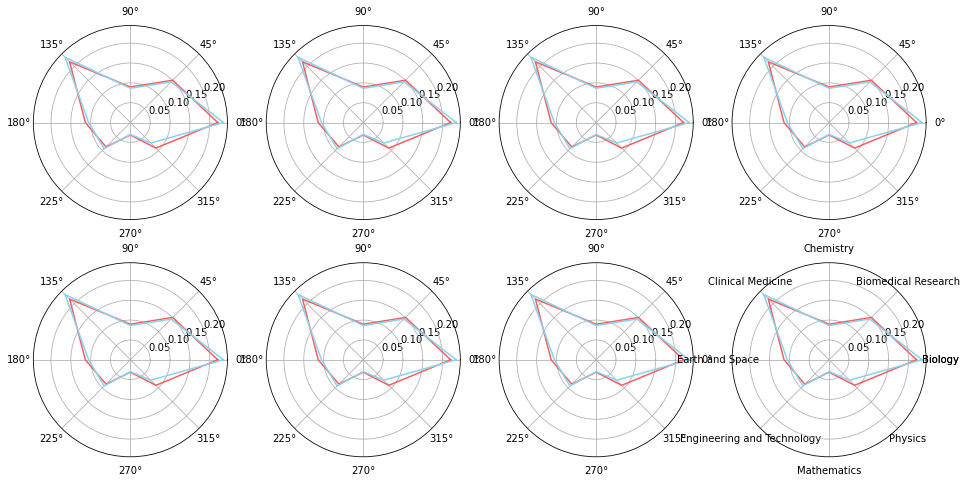

In [153]:
cntrylist=['Georgia','Qatar','Portugal','South Africa','Chile','Spain','United States','China']
fig, axs = plt.subplots(2, 4, subplot_kw=dict(projection="polar"),figsize=(16,8))
axs=axs.flatten()
for index,c in enumerate(cntrylist):
    plot_cntry(c,axs[index])